 **Logistic Regression Model for User Authentication based on Keystroke Dynamics.**
 
 Below is the implementation of the logistic regression machine learning model using Scikit-learn module.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

**Load and explore data**

In [7]:
data = pd.read_csv(r"C:\Users\Admin\Desktop\Keystroke_analysis\KeystrokeLoggingApplication\src\Keystrokes.csv", on_bad_lines='skip')

In [3]:
data.columns

Index(['User', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i',
       'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e',
       ...
       'Unnamed: 452', 'Unnamed: 453', 'Unnamed: 454', 'Unnamed: 455',
       'Unnamed: 456', 'Unnamed: 457', 'Unnamed: 458', 'Unnamed: 459',
       'Unnamed: 460', 'Unnamed: 461'],
      dtype='object', length=462)

**Data Visualization**

C:\Users\Admin\AppData\Local\Temp\ipykernel_5460\2902392023.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette={'Genuine': 'royalblue', 'Imposter': 'orange'})


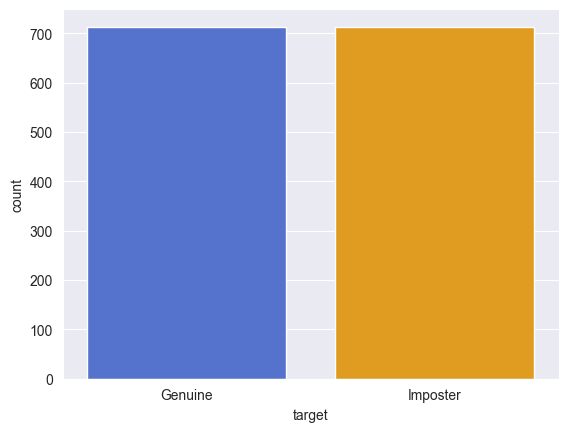

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='target', data=data, palette={'Genuine': 'royalblue', 'Imposter': 'orange'})
plt.show()

**Split data into train and test data**

In [10]:
train, test = train_test_split(data, test_size = 0.2)
features = list(data.columns[1:32])
X = data[features]
y =data['target']
X_train = train[features]
y_train = train['target']
X_test = test[features]
y_test = test['target']

**Create logistic regression model and train it with training data**

In [11]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

ValueError: could not convert string to float: 'Genuine'

**Predict results**

In [69]:
pred = logmodel.predict(X_test)

In [70]:
df = pd.DataFrame(y_test)
se = pd.Series(pred)
df['Predictions'] = se.values
tempdf = pd.DataFrame(logmodel.predict_proba(X_test))
se1 = pd.Series(tempdf[0])
ew = se1.round(decimals=3)
df['Genuine probability'] = ew.values
se2 = pd.Series(tempdf[1])
ew1 = se2.round(decimals=3)
df['Imposter probability'] = ew1.values

In [71]:
df

,Target,Predictions,Genuine probability,Imposter probability
719,Imposter,Imposter,0.097,0.903
1169,Imposter,Genuine,0.678,0.322
1341,Imposter,Imposter,0.213,0.787
679,Genuine,Genuine,0.927,0.073
332,Genuine,Genuine,0.862,0.138
...,...,...,...,...
992,Imposter,Imposter,0.434,0.566
139,Genuine,Imposter,0.171,0.829
1128,Imposter,Imposter,0.327,0.673
819,Imposter,Imposter,0.073,0.927


**Check Performance of Model**

Accuracy

In [72]:
model_accuracy = metrics.accuracy_score(y_test,pred)

In [73]:
y_test.value_counts()

Target
Genuine     154
Imposter    131
Name: count, dtype: int64

In [76]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
print(cm)

[[148   6]
 [ 13 118]]


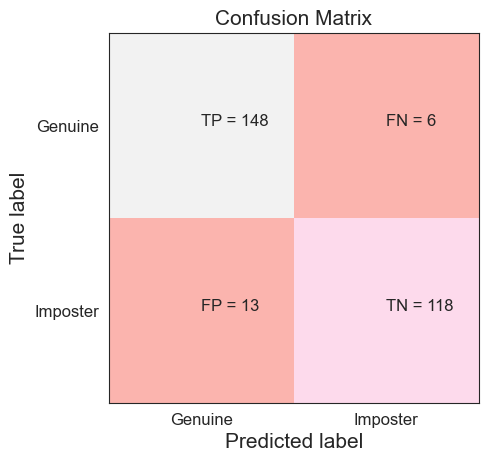

In [77]:
sns.set_style('white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 15)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=12)
plt.yticks(tick_marks, classNames,fontsize=12)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

 ***Basic Terminology***
 
 ***True Positive (TP) : ***  We correctly predicted the user is Geninue
 
 ***True Negative (TN) : ***  We correctly predicted the user is Imposter
 
 ***False Positive (FP) : ***  We incorrectly predicted the user is geninue

 ***False Negative (FN) : ***  We incorrectly predicted the user is imposter 
 
  

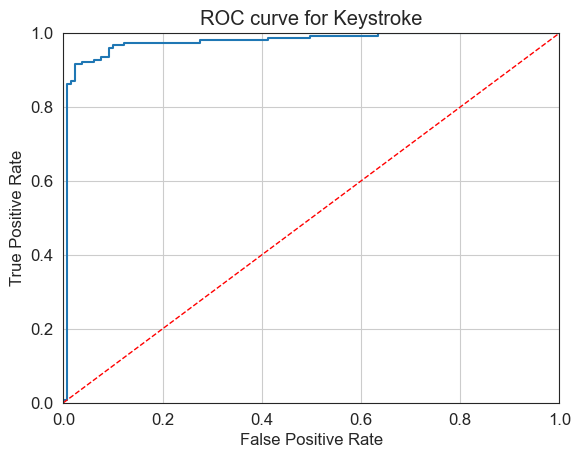

In [78]:
probs = logmodel.predict_proba(X_test)
preds = probs[:,0]
fpr, tpr,threshold= metrics.roc_curve(y_test, preds,pos_label='Genuine')
plt.figure()
lw = 1
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Keystroke')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
roc_auc= metrics.auc(fpr,tpr)

In [79]:
print("Accuracy of Model is: ", model_accuracy*100)
print()
print("Mis-Classification Rate of Model is: ",(1-model_accuracy)*100)
print()
print("Area Under Curve: ",roc_auc)

Accuracy of Model is:  93.33333333333333

Mis-Classification Rate of Model is:  6.666666666666665

Area Under Curve:  0.9755626053335977
